In [25]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [26]:
# Loading in the Data
df = pd.read_csv(r'/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/fifawc2018.csv')

df.head(7)

,Unnamed: 0,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_competition_id,competition_country_name,competition_competition_name,season_season_id,season_season_name,home_team_home_team_id,home_team_home_team_name,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team_away_team_name,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,0,7554,2018-07-03,20:00:00.000,1,1,available,scheduled,2023-07-24T13:06:27.791230,2021-06-13T16:17:31.694,4,43,International,FIFA World Cup,3,2018,769,Colombia,male,NaN,49,Colombia,"[{'id': 634, 'name': 'José Néstor Pekerman', '...",768,England,male,NaN,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",1.0.2,33,Round of 16,4130,Otkritie Bank Arena,188,Russia,435,Mark Geiger,241,United States of America
1,1,7554,2018-06-28,20:00:00.000,0,1,available,scheduled,2023-07-24T13:06:39.637575,2021-06-13T16:17:31.694,3,43,International,FIFA World Cup,3,2018,768,England,male,G,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",782,Belgium,male,G,22,Belgium,"[{'id': 263, 'name': 'Roberto Martínez Montoli...",1.0.2,10,Group Stage,4260,Stadion Kaliningrad,188,Russia,420,Damir Skomina,208,Slovenia
2,2,7554,2018-07-03,16:00:00.000,1,0,available,scheduled,2023-07-24T13:05:18.578795,2021-06-13T16:17:31.694,4,43,International,FIFA World Cup,3,2018,790,Sweden,male,NaN,220,Sweden,"[{'id': 549, 'name': 'Jan Olof Andersson', 'ni...",773,Switzerland,male,NaN,221,Switzerland,"[{'id': 492, 'name': 'Vladimir Petković', 'nic...",1.0.2,33,Round of 16,4726,Saint-Petersburg Stadium,188,Russia,420,Damir Skomina,208,Slovenia
3,3,7554,2018-06-25,20:00:00.000,1,1,available,scheduled,2023-07-24T13:03:08.956903,2021-06-13T16:17:31.694,3,43,International,FIFA World Cup,3,2018,797,Iran,male,B,107,"Iran, Islamic Republic of","[{'id': 645, 'name': 'Carlos Manuel Brito Leal...",780,Portugal,male,B,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",1.0.2,10,Group Stage,4259,Mordovia Arena,188,Russia,731,Enrique Cáceres,178,Paraguay
4,4,7554,2018-06-20,14:00:00.000,1,0,available,scheduled,2023-07-24T13:02:10.657273,2021-06-13T16:17:31.694,2,43,International,FIFA World Cup,3,2018,780,Portugal,male,B,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",788,Morocco,male,B,154,Morocco,"[{'id': 642, 'name': 'Hervé Renard', 'nickname...",1.0.2,10,Group Stage,255,Stadion Luzhniki,188,Russia,435,Mark Geiger,241,United States of America
5,5,7554,2018-07-11,20:00:00.000,2,1,available,scheduled,2023-07-24T13:01:34.707926,2021-06-13T16:17:31.694,6,43,International,FIFA World Cup,3,2018,785,Croatia,male,NaN,56,Croatia,"[{'id': 307, 'name': 'Zlatko Dalić', 'nickname...",768,England,male,NaN,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",1.0.2,15,Semi-finals,255,Stadion Luzhniki,188,Russia,581,Cüneyt Çakιr,233,Turkey
6,6,7554,2018-06-24,14:00:00.000,6,1,available,scheduled,2023-07-24T13:00:20.523280,2021-06-13T16:17:31.694,2,43,International,FIFA World Cup,3,2018,768,England,male,G,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",798,Panama,male,G,176,Panama,"[{'id': 654, 'name': 'Hernán Darío Gómez Jaram...",1.0.2,10,Group Stage,4263,Stadion Nizhny Novgorod (Nizhniy Novgorod),188,Russia,992,Ghead Grisha,66,Egypt


In [27]:
# Tweaking Columns for Optimal Usage

df['competition_competition_name'] = df['competition_competition_name'].apply(lambda x: x + ' 2018') # Applying a Function for getting the Name & Edition in one Column
df['Match-Up'] = df['home_team_home_team_name'] + ' v ' + df['away_team_away_team_name'] # One Place for both Teams
df['Result'] = (df['home_score'].astype(str)) + '-' + (df['away_score'].astype(str)) # One Place for the Final Score too

df.rename(columns = {'competition_competition_name': 'Competition', 'home_team_home_team_name': 'Home Team', 
                    'away_team_away_team_name': 'Away Team', 'home_score': 'Home Score', 'away_score': 'Away Score'}, inplace = True)

df.drop(columns = ['Unnamed: 0'], inplace = True)

In [28]:
# Advanced Analytics

pivot1 = df.groupby(['Competition', 'competition_stage_name'])[['Home Score', 'Away Score']].sum()
pivot2 = df.groupby(['Competition', 'competition_stage_name'])['match_id'].count().reset_index().rename(columns = {'match_id': 'Matches Played'})
pivot2 = pivot2.set_index(['Competition', 'competition_stage_name'])

final_pivot = pivot1.join(pivot2)
final_pivot.rename(columns = {'Home Score': 'Goals Scored at Home', 'Away Score': 'Goals Scored Away from Home'}, inplace = True)
final_pivot[['Matches Played', 'Goals Scored at Home', 'Goals Scored Away from Home']]

Matches Played  \
Competition         competition_stage_name                   
FIFA World Cup 2018 3rd Place Final                      1   
                    Final                                1   
                    Group Stage                         48   
                    Quarter-finals                       4   
                    Round of 16                          8   
                    Semi-finals                          2   

                                            Goals Scored at Home  \
Competition         competition_stage_name                         
FIFA World Cup 2018 3rd Place Final                            2   
                    Final                                      4   
                    Group Stage                               64   
                    Quarter-finals                             3   
                    Round of 16                               15   
                    Semi-finals                                3   

                                            Goals Scored Away from Home  
Competition         competition_stage_name                               
FIFA World Cup 2018 3rd Place Final                                   0  
                    Final                                             2  
                    Group Stage                                      58  
                    Quarter-finals                                    8  
                    Round of 16                                       9  
                    Semi-finals                                       1

In [29]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 1]).round(2)

,match_id,Home Score,Away Score,match_week,competition_competition_id,season_season_id,season_season_name,home_team_home_team_id,home_team_country_id,away_team_away_team_id,away_team_country_id,competition_stage_id,stadium_id,stadium_country_id,referee_id,referee_country_id
count,64.0,64.00,64.00,64.00,64.0,64.0,64.0,64.00,64.00,64.00,64.00,64.00,64.00,64.0,64.00,64.00
mean,7554.0,1.42,1.22,2.72,43.0,3.0,2018.0,782.28,122.48,782.73,122.95,13.58,13839.11,188.0,555.28,149.12
std,0.0,1.35,0.92,1.54,0.0,0.0,0.0,8.83,75.36,9.62,72.56,7.92,33822.62,0.0,235.67,80.23
min,7554.0,0.00,0.00,1.00,43.0,3.0,2018.0,768.00,11.00,768.00,11.00,10.00,249.00,188.0,76.00,11.00
25%,7554.0,0.00,0.75,1.75,43.0,3.0,2018.0,775.00,56.00,774.00,59.75,10.00,256.00,188.0,347.00,81.75
50%,7554.0,1.00,1.00,2.50,43.0,3.0,2018.0,782.00,110.50,782.50,114.00,10.00,4258.00,188.0,728.50,161.50
75%,7554.0,2.00,2.00,3.25,43.0,3.0,2018.0,789.25,188.00,791.25,188.00,10.25,4263.00,188.0,736.25,214.00
90%,7554.0,3.00,2.00,5.00,43.0,3.0,2018.0,795.70,220.00,795.70,220.00,33.00,4726.00,188.0,741.00,241.70
100%,7554.0,6.00,3.00,7.00,43.0,3.0,2018.0,799.00,242.00,799.00,242.00,33.00,118023.00,188.0,992.00,253.00
max,7554.0,6.00,3.00,7.00,43.0,3.0,2018.0,799.00,242.00,799.00,242.00,33.00,118023.00,188.0,992.00,253.00


In [30]:
print('\n', df[['Home Score', 'Away Score']].min())
print('\n', df[['Home Score', 'Away Score']].max())
print('\n', df[['Home Score', 'Away Score']].std().round(2))
df[['Home Score', 'Away Score']].boxplot(figsize = (6, 4))


 Home Score    0
Away Score    0
dtype: int64

 Home Score    6
Away Score    3
dtype: int64

 Home Score    1.35
Away Score    0.92
dtype: float64


<Axes: xlabel='Home Score', ylabel='Count'>

In [31]:
# Some more Statistical Information

import scipy.stats as stats

print(stats.skew(df['Home Score'], nan_policy = 'omit').round(2)) # = 1.25 -> Distribution is Highly Positively (Right-) Skewed; Majority of Data points are Clustered on the Left side and a long tail extends to the Right
print(stats.kurtosis(df['Home Score'].dropna()).round(2)) # 1.59, compared to a Normal Distribution's 3, meaning it's a "Platykurtic" Distribution with Thinner Tails and Fewer Outliers

1.25
1.59


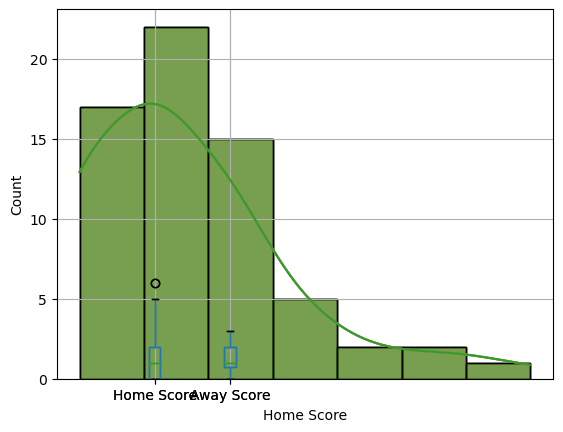

In [32]:
# Visualizing this^ kind of Statistical Info

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Home Score'].dropna(), kde = True)
plt.show()

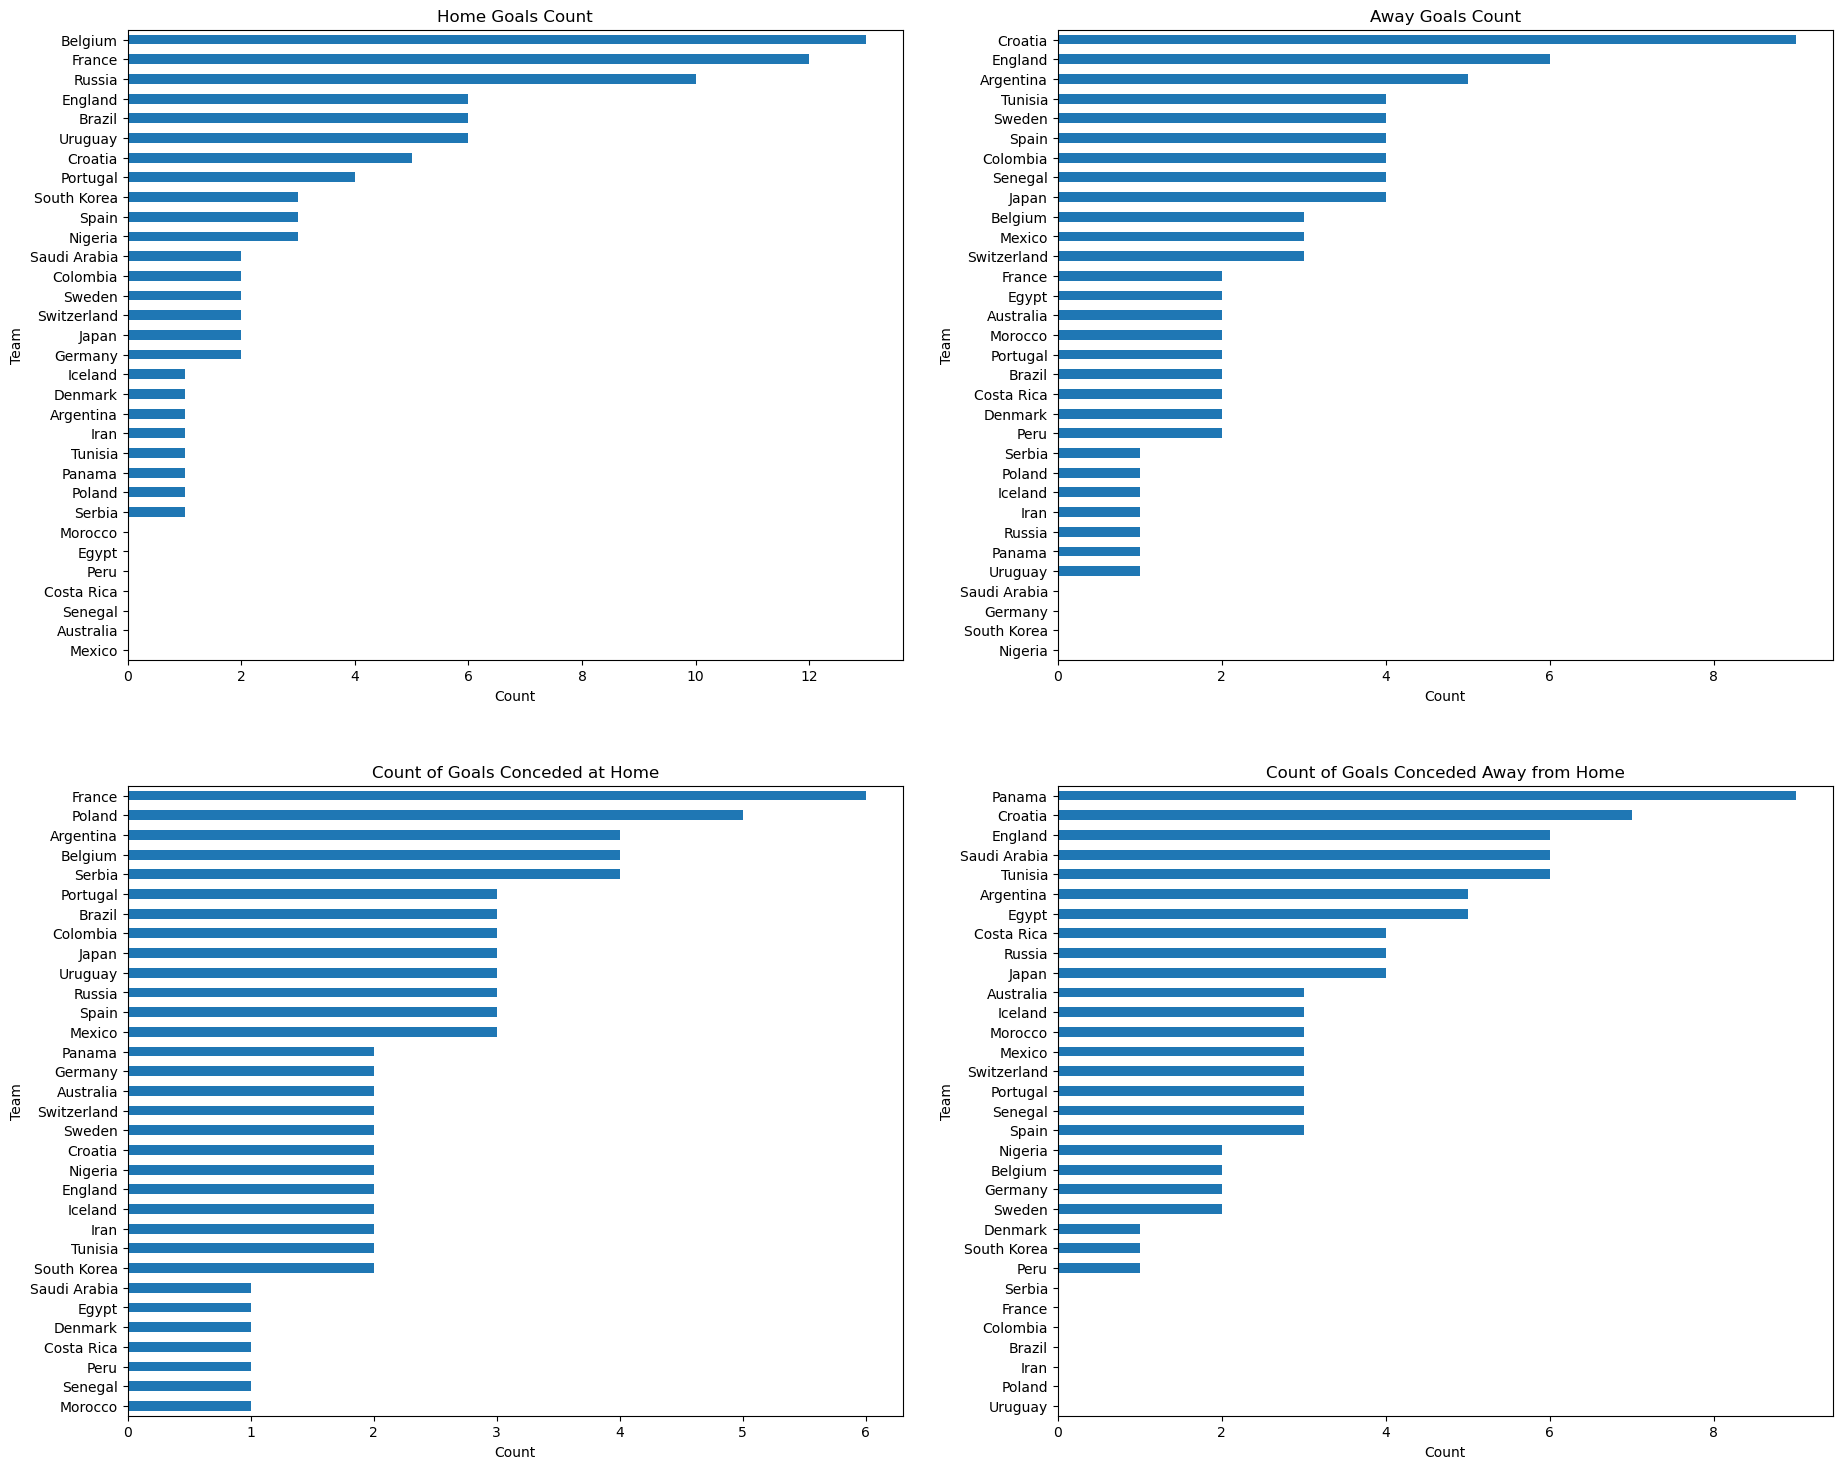

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize = (22, 18))

df.groupby('Home Team')['Home Score'].sum().sort_values().plot(kind = 'barh', ax = axes[0, 0], title = 'Home Goals Count', xlabel = 'Count', ylabel = 'Team')
df.groupby('Away Team')['Away Score'].sum().sort_values().plot(kind = 'barh', ax = axes[0, 1], title = 'Away Goals Count', xlabel = 'Count', ylabel = 'Team')
df.groupby('Home Team')['Away Score'].sum().sort_values().plot(kind = 'barh', ax = axes[1, 0], title = 'Count of Goals Conceded at Home', xlabel = 'Count', ylabel = 'Team')
df.groupby('Away Team')['Home Score'].sum().sort_values().plot(kind = 'barh', ax = axes[1, 1], title = 'Count of Goals Conceded Away from Home', xlabel = 'Count', ylabel = 'Team')

plt.show()

## Polynomial Regression

In [35]:
home_goals = df.groupby('Home Team')['Home Score'].sum()
away_goals = df.groupby('Away Team')['Away Score'].sum()

home_conceded = df.groupby('Home Team')['Away Score'].sum()
away_conceded = df.groupby('Away Team')['Home Score'].sum()

total_goals_scored = home_goals.add(away_goals, fill_value = 0)
total_goals_conceded = home_conceded.add(away_conceded, fill_value = 0)

total_goals_scored = total_goals_scored.reset_index().rename(columns = {'Home Team': 'Team', 0: 'Total Goals Scored'})
total_goals_conceded = total_goals_conceded.reset_index().rename(columns = {'Home Team': 'Team', 0: 'Total Goals Conceded'})

In [36]:
teams = total_goals_scored.merge(total_goals_conceded)
teams['Overall Goal Difference'] = (teams['Total Goals Scored'] - teams['Total Goals Conceded']).astype(int)
teams

,Team,Total Goals Scored,Total Goals Conceded,Overall Goal Difference
0,Argentina,6,9,-3
1,Australia,2,5,-3
2,Belgium,16,6,10
3,Brazil,8,3,5
4,Colombia,6,3,3
5,Costa Rica,2,5,-3
6,Croatia,14,9,5
7,Denmark,3,2,1
8,Egypt,2,6,-4
9,England,12,8,4


In [37]:
# Creating Polynomial Features based on our Current Features

from sklearn.preprocessing import PolynomialFeatures

rng = np.random.default_rng(32)
X = teams['Overall Goal Difference'].values
y = 40 + 2*X - 0.1*(X**2) + rng.normal(0, 5, len(X)) # Hypothetical Outcome "y" = Predicted Points/Score of Performance: Random 'X' Powered, then added to Range/Count

# ^the Lower the "x" * X -> the less Noise in the data -> the more we'll see the Actual Function

# for "y" = Generates Random Integer Values between -4 and 11 (both Inclusive) - which is the Range for Goal Differences for each Team, 
## Then the y-values will be a Function of the x-values + randomness to get some Noise (Normal Distribution to get a Base Function, 
## Then along it a Gaussian Bell Curve to just Generate some Random Data

In [38]:
# Creating Polynomial Features for Subsequent Polynomial Regression

poly_features = PolynomialFeatures(degree = 4, include_bias = False) # Creating a more Complex Function to Fit more Training Points (but we should not make a too-Complex one, as then some Points might be totally missed)
# Should be Careful that the Model is not Overfitting

X_poly = poly_features.fit_transform(X.reshape(-1, 1))

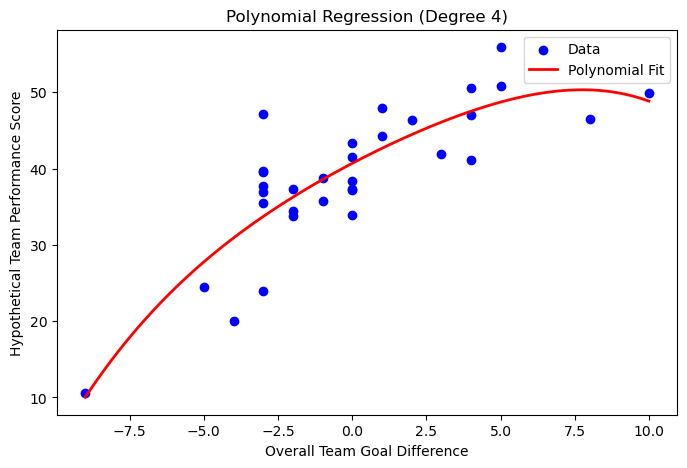

In [39]:
# Fitting a Polynomial Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y)

# Generating a Smooth curve (more points for Smoothness)
X_vals = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_vals_poly = poly_features.transform(X_vals)
y_vals = model.predict(X_vals_poly)

# Visualizing it
plt.figure(figsize = (8, 5))
plt.scatter(X, y, color = "blue", label = "Data")
plt.plot(X_vals.flatten(), y_vals, color = "red", linewidth = 2, label = "Polynomial Fit")
plt.xlabel("Overall Team Goal Difference")
plt.ylabel("Hypothetical Team Performance Score")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()

## OLS Regression

In [41]:
import statsmodels.formula.api as smf

In [42]:
# A Very Basic OLS Regression Model

teams.rename(columns = {'Total Goals Scored': 'total_goals_scored', 'Total Goals Conceded': 'total_goals_conceded',
                        'Overall Goal Difference': 'overall_goal_difference'}, inplace = True)

print(smf.ols(formula = 'overall_goal_difference ~ total_goals_scored + total_goals_conceded', data = teams).fit().summary())

# A Perfectly Simple +1 and -1 Coefficient for Goals Scored and Goals Conceded, respectively, on Goal Difference
# Both Predictors are Statistically Significant too (p-value of 0.000 for both)

                               OLS Regression Results                              
Dep. Variable:     overall_goal_difference   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 3.336e+31
Date:                     Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                             22:55:45   Log-Likelihood:                 1030.0
No. Observations:                       32   AIC:                            -2054.
Df Residuals:                           29   BIC:                            -2050.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [43]:
# ^Coefficients reported in Log-Odds (Logits) for Logistic Regression
# "smf.logit(..." -> Logit: Independent variables can be Categorical; Dependent ones MUST be Numeric

display(np.exp(smf.ols(formula = 'overall_goal_difference ~ total_goals_scored + total_goals_conceded', data = teams).fit().params))

Intercept               1.000000
total_goals_scored      2.718282
total_goals_conceded    0.367879
dtype: float64

In [44]:
# Logistic Regression

from sklearn.preprocessing import MinMaxScaler

mm_sc = MinMaxScaler(feature_range = (0, 1)) # This "endog" (Independent variable) must be in the Unit Interval (0, 1) of Probabilities

teams['overall_goal_difference_sc'] = mm_sc.fit_transform(teams['overall_goal_difference'].values.reshape(-1, 1))

print(smf.logit(formula = 'overall_goal_difference_sc ~ total_goals_scored + total_goals_conceded', data = teams).fit().summary())

Optimization terminated successfully.
         Current function value: 0.545900
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     overall_goal_difference_sc   No. Observations:                   32
Model:                                  Logit   Df Residuals:                       29
Method:                                   MLE   Df Model:                            2
Date:                        Sat, 06 Sep 2025   Pseudo R-squ.:                  0.2028
Time:                                22:55:45   Log-Likelihood:                -17.469
converged:                               True   LL-Null:                       -21.914
Covariance Type:                    nonrobust   LLR p-value:                   0.01174
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               

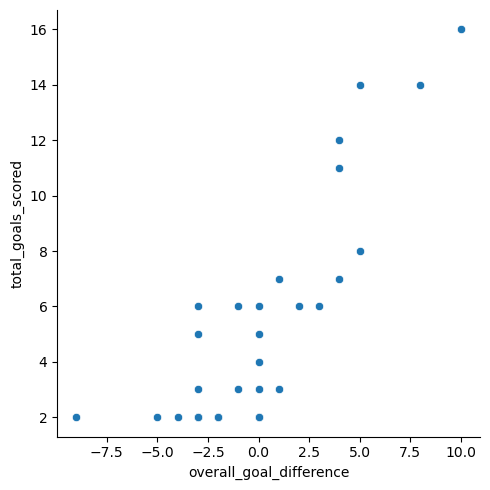

In [45]:
import seaborn as sns

scplot = sns.relplot(
    x = 'overall_goal_difference',
    y = 'total_goals_scored',
    data = teams,
)
plt.show(scplot)

In [225]:
# Function

def DataFrameFormatter(df):
    df = df.drop_duplicates().copy()

    df.columns = df.columns.str.replace('[^a-zA-Z0-9_\s]', '', regex = True) # Remove Anything NOT in this Set ("[^a-zA-Z0-9_\s]")
    df.columns = df.columns.str.lower().str.replace(' ', '_', regex = False)

    numeric_cols = df.select_dtypes(include = ['number']).columns

    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df = df.dropna(subset = [col])

    print("Cleaned Columns:", '\n', df.columns.tolist())
    print("\nShape:", df.shape)
    print("\nNumeric Columns:", '\n', numeric_cols, "\n")

    return df.head(5)

In [227]:
DataFrameFormatter(df)

Cleaned Columns: 
 ['match_id', 'match_date', 'kick_off', 'home_score', 'away_score', 'match_status', 'match_status_360', 'last_updated', 'last_updated_360', 'match_week', 'competition_competition_id', 'competition_country_name', 'competition', 'season_season_id', 'season_season_name', 'home_team_home_team_id', 'home_team', 'home_team_home_team_gender', 'home_team_home_team_group', 'home_team_country_id', 'home_team_country_name', 'home_team_managers', 'away_team_away_team_id', 'away_team', 'away_team_away_team_gender', 'away_team_away_team_group', 'away_team_country_id', 'away_team_country_name', 'away_team_managers', 'metadata_data_version', 'competition_stage_id', 'competition_stage_name', 'stadium_id', 'stadium_name', 'stadium_country_id', 'stadium_country_name', 'referee_id', 'referee_name', 'referee_country_id', 'referee_country_name', 'matchup', 'result']

Shape: (64, 42)

Numeric Columns: 
 Index(['match_id', 'home_score', 'away_score', 'match_week',
       'competition_competi

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_competition_id,competition_country_name,competition,season_season_id,season_season_name,home_team_home_team_id,home_team,home_team_home_team_gender,home_team_home_team_group,home_team_country_id,home_team_country_name,home_team_managers,away_team_away_team_id,away_team,away_team_away_team_gender,away_team_away_team_group,away_team_country_id,away_team_country_name,away_team_managers,metadata_data_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,matchup,result
0,7554,2018-07-03,20:00:00.000,1,1,available,scheduled,2023-07-24T13:06:27.791230,2021-06-13T16:17:31.694,4,43,International,FIFA World Cup 2018,3,2018,769,Colombia,male,NaN,49,Colombia,"[{'id': 634, 'name': 'José Néstor Pekerman', '...",768,England,male,NaN,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",1.0.2,33,Round of 16,4130,Otkritie Bank Arena,188,Russia,435,Mark Geiger,241,United States of America,Colombia v England,1-1
1,7554,2018-06-28,20:00:00.000,0,1,available,scheduled,2023-07-24T13:06:39.637575,2021-06-13T16:17:31.694,3,43,International,FIFA World Cup 2018,3,2018,768,England,male,G,68,England,"[{'id': 277, 'name': 'Gareth Southgate', 'nick...",782,Belgium,male,G,22,Belgium,"[{'id': 263, 'name': 'Roberto Martínez Montoli...",1.0.2,10,Group Stage,4260,Stadion Kaliningrad,188,Russia,420,Damir Skomina,208,Slovenia,England v Belgium,0-1
2,7554,2018-07-03,16:00:00.000,1,0,available,scheduled,2023-07-24T13:05:18.578795,2021-06-13T16:17:31.694,4,43,International,FIFA World Cup 2018,3,2018,790,Sweden,male,NaN,220,Sweden,"[{'id': 549, 'name': 'Jan Olof Andersson', 'ni...",773,Switzerland,male,NaN,221,Switzerland,"[{'id': 492, 'name': 'Vladimir Petković', 'nic...",1.0.2,33,Round of 16,4726,Saint-Petersburg Stadium,188,Russia,420,Damir Skomina,208,Slovenia,Sweden v Switzerland,1-0
3,7554,2018-06-25,20:00:00.000,1,1,available,scheduled,2023-07-24T13:03:08.956903,2021-06-13T16:17:31.694,3,43,International,FIFA World Cup 2018,3,2018,797,Iran,male,B,107,"Iran, Islamic Republic of","[{'id': 645, 'name': 'Carlos Manuel Brito Leal...",780,Portugal,male,B,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",1.0.2,10,Group Stage,4259,Mordovia Arena,188,Russia,731,Enrique Cáceres,178,Paraguay,Iran v Portugal,1-1
4,7554,2018-06-20,14:00:00.000,1,0,available,scheduled,2023-07-24T13:02:10.657273,2021-06-13T16:17:31.694,2,43,International,FIFA World Cup 2018,3,2018,780,Portugal,male,B,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",788,Morocco,male,B,154,Morocco,"[{'id': 642, 'name': 'Hervé Renard', 'nickname...",1.0.2,10,Group Stage,255,Stadion Luzhniki,188,Russia,435,Mark Geiger,241,United States of America,Portugal v Morocco,1-0


In [323]:
# Playbook: Web-Scraping Function

def web_scraper(link, table_no):
    
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd

    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find_all('table')[table_no]

    # Converting the HTML table to a DataFrame
    df = pd.read_html(str(table))[0]

    # If MultiIndex in columns -> Flattening it
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join([str(c) for c in col if c]) for col in df.columns.values]

    df = df.drop_duplicates()
    df = df.dropna(how = 'all')

    df.columns = (df.columns.astype(str).str.replace('[^a-zA-Z0-9_\s]', '', regex = True).str.lower().str.replace(' ', '_', regex = False))

    return df.head(7)

In [339]:
web_scraper('https://fbref.com/en/comps/9/Premier-League-Stats', 0)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,ptsmp,xg,xga,xgd,xgd90,last_5,attendance,top_team_scorer,goalkeeper,notes
0,1,Liverpool,3,3,0,0,8,4,4,9,3.00,3.4,3.2,0.2,0.08,W W W,60315,Hugo Ekitike - 2,Alisson,NaN
1,2,Chelsea,3,2,1,0,7,1,6,7,2.33,6.4,2.3,4.1,1.38,D W W,39678,"João Pedro, Enzo Fernández - 2",Robert Sánchez,NaN
2,3,Arsenal,3,2,0,1,6,1,5,6,2.00,4.4,2.2,2.2,0.75,W W L,60110,"Viktor Gyökeres, Jurriën Timber - 2",David Raya,NaN
3,4,Tottenham,3,2,0,1,5,1,4,6,2.00,3.6,4.0,-0.4,-0.13,W W L,61164,"Richarlison, Brennan Johnson - 2",Guglielmo Vicario,NaN
4,5,Everton,3,2,0,1,5,3,2,6,2.00,4.3,5.5,-1.2,-0.41,L W W,51759,Iliman Ndiaye - 2,Jordan Pickford,NaN
5,6,Sunderland,3,2,0,1,5,3,2,6,2.00,3.0,2.8,0.3,0.10,W L W,46250,Wilson Isidor - 2,Robin Roefs,NaN
6,7,Bournemouth,3,2,0,1,4,4,0,6,2.00,4.5,2.9,1.7,0.55,L W W,11070,Antoine Semenyo - 2,Đorđe Petrović,NaN


In [ ]:
# Making Dummy Columns & Concatenating the DataFrame with them for Subsequent Hot-Encoded Machine Learning

df = pd.concat([df.drop('competition_stage_name', axis = 1), pd.get_dummies(df['competition_stage_name']).add_prefix('comp_stage_')], axis = 1)
df.head(6)